Bu ödevde [ABD Eğitim Sistemi](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Toplam gelir verilerini içeren *TOTAL_REVENUE* ve toplam harcama verilerini içeren *TOTAL_EXPENDITURE* değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (*TOTAL_REVENUE*) ve toplam harcama (*TOTAL_EXPENDITURE*) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama (*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (*TOTAL_REVENUE*) değişkeninden, toplam harcama(*TOTAL_EXPENDITURE*) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende  de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz? 

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi? 

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You can see too many outliers outside of box and wish.

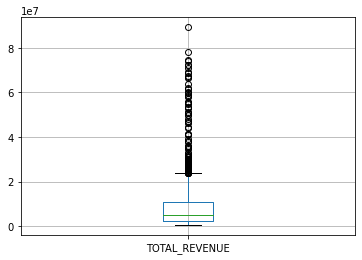

In [4]:
df.boxplot(["TOTAL_REVENUE"]);

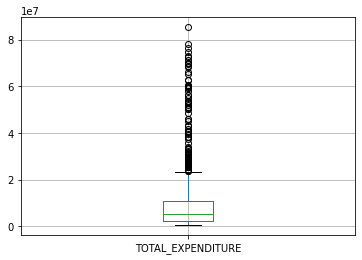

In [5]:
df.boxplot(["TOTAL_EXPENDITURE"]);

Converting outliers with Log.
Then, variable is more closely distributed to a normal distribution.

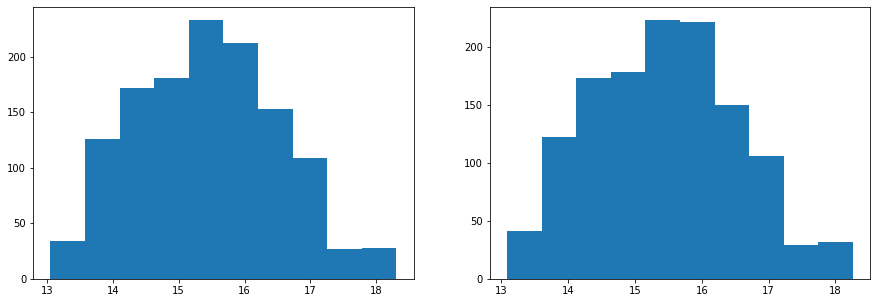

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(np.log(df["TOTAL_REVENUE"]))

plt.subplot(1,2,2)
plt.hist(np.log(df["TOTAL_EXPENDITURE"]))

plt.show()

The chart on the right shows that the log transform has narrowed the range of values and the outliers beyond the whiskers are now different from the chart on the left.

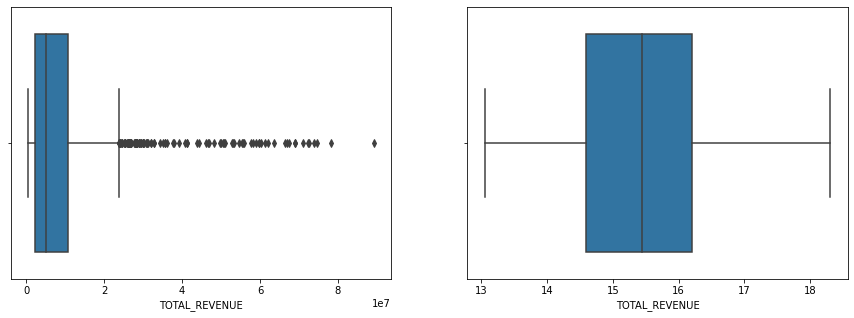

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(df["TOTAL_REVENUE"]);

plt.subplot(1,2,2)
sns.boxplot(np.log(df["TOTAL_REVENUE"]))
plt.show()

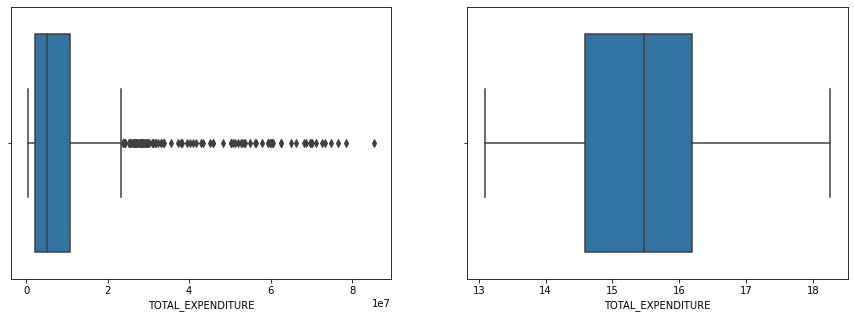

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(df["TOTAL_EXPENDITURE"]);

plt.subplot(1,2,2)
sns.boxplot(np.log(df["TOTAL_EXPENDITURE"]))
plt.show()

In [51]:
df['deficit_spending']=df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
df['deficit_spending']

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -878807.0
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: deficit_spending, Length: 1715, dtype: float64

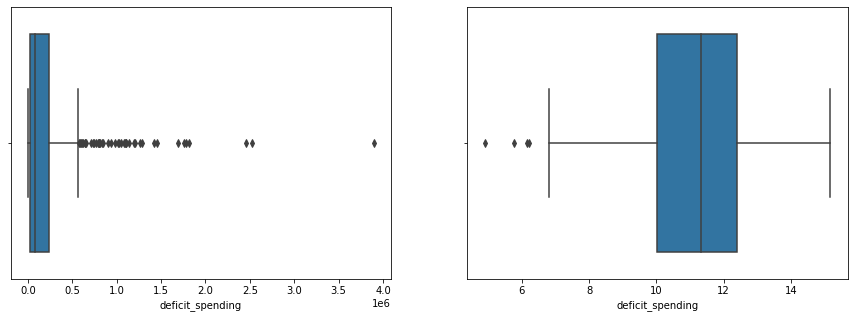

In [80]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(df['deficit_spending']);

plt.subplot(1,2,2)
sns.boxplot(np.log(df['deficit_spending']))
plt.show()

In [98]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-0.1*iqr
    fence_high = q3+0.1*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [99]:
new_df=remove_outlier(df, "deficit_spending")

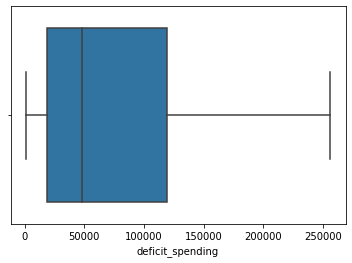

In [100]:
sns.boxplot((new_df['deficit_spending']))

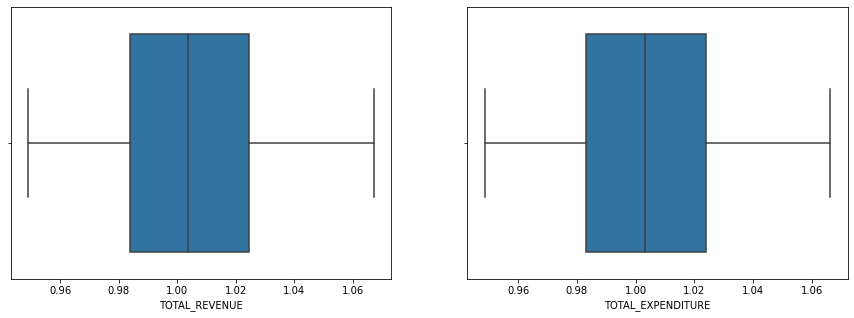

In [108]:
df["TOTAL_REVENUE"]=np.log(df["TOTAL_REVENUE"])
df["TOTAL_EXPENDITURE"]=np.log(df["TOTAL_EXPENDITURE"])
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(df["TOTAL_REVENUE"]);

plt.subplot(1,2,2)
sns.boxplot(df["TOTAL_EXPENDITURE"])
plt.show()

In [109]:
df['deficit_spending2']=df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
df['deficit_spending2']

0       0.000236
1       0.002101
6       0.000727
7       0.000290
9       0.000388
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: deficit_spending2, Length: 971, dtype: float64

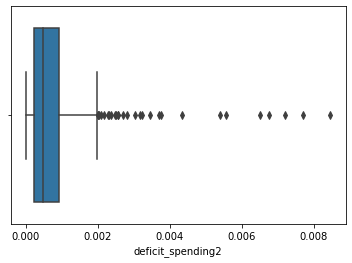

In [110]:
sns.boxplot((df['deficit_spending2']))

In [111]:
new_df2=remove_outlier(df, "deficit_spending2")

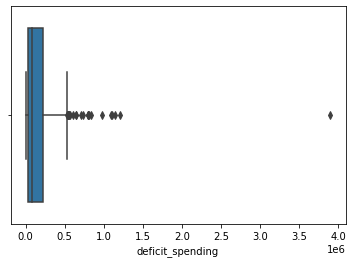

In [112]:
sns.boxplot((new_df2['deficit_spending']))

After examining both columns separately and clearing out the outliers, it was more useful to create a new variable from them. Because as a result of the transaction, I encountered less outliers.